In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from mutation import *
from crossover import *
from rmp import *
from mfea import *
from task import *
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

In [4]:
gnbg_tasks = []
gnbg_tasks.append(GNBGTask(1))
gnbg_tasks.append(GNBGTask(2))
gnbg_tasks.append(GNBGTask(3))
gnbg_tasks.append(GNBGTask(4))
gnbg_tasks.append(GNBGTask(5))

In [5]:
crossover = BLXCrossover(alpha=0.5)
mutation = PolynomialMutation(eta_m=20, bound=100.0)
rmp = NormalRMP(default_rmp_value=0.3)
num_indis_per_task = 220
indi_len = 30
bound = 100.0
a = AMFEA(num_indis_per_task, indi_len, bound, gnbg_tasks, crossover, mutation, rmp)

Initialization:
Task 0:
Best Fitness: 98374.43961865561
Mean Fitness: 171386.76645855006

Task 1:
Best Fitness: -701.3891582246138
Mean Fitness: -701.3097111243025

Task 2:
Best Fitness: 55890156260.16833
Mean Fitness: 94815214607.22061

Task 3:
Best Fitness: 366935.973503177
Mean Fitness: 890762.605060093

Task 4:
Best Fitness: -334.1007883512572
Mean Fitness: -333.99295612302905



In [6]:
bfs, mfs = a.fit(5000, monitor=False, monitor_rate=100)

Gen 0
Time taken: 0.03 seconds

Gen 100
Time taken: 0.03 seconds

Gen 200
Time taken: 0.01 seconds

Gen 300
Time taken: 0.02 seconds

Gen 400
Time taken: 0.02 seconds

Gen 500
Time taken: 0.04 seconds

Gen 600
Time taken: 0.01 seconds

Gen 700
Time taken: 0.03 seconds

Gen 800
Time taken: 0.01 seconds

Gen 900
Time taken: 0.04 seconds

Gen 1000
Time taken: 0.05 seconds

Gen 1100
Time taken: 0.05 seconds

Gen 1200
Time taken: 0.07 seconds

Gen 1300
Time taken: 0.05 seconds

Gen 1400
Time taken: 0.03 seconds

Gen 1500
Time taken: 0.01 seconds

Gen 1600
Time taken: 0.06 seconds

Gen 1700
Time taken: 0.03 seconds

Gen 1800
Time taken: 0.03 seconds

Gen 1900
Time taken: 0.02 seconds

Gen 2000
Time taken: 0.02 seconds

Gen 2100
Time taken: 0.05 seconds

Gen 2200
Time taken: 0.02 seconds

Gen 2300
Time taken: 0.05 seconds

Gen 2400
Time taken: 0.04 seconds

Gen 2500
Time taken: 0.12 seconds

Gen 2600
Time taken: 0.05 seconds

Gen 2700
Time taken: 0.06 seconds

Gen 2800
Time taken: 0.16 second

In [14]:
for gnbg_task in gnbg_tasks:
    print(gnbg_task.gnbg.OptimumValue)

-1081.9837994003399
-703.1328146165181
-357.5797495903721
-382.6205211774271
-337.50899809752036


In [15]:
for gnbg_task in gnbg_tasks:
    print(gnbg_task.gnbg.BestFoundResult)

-1081.983775937015
-702.715562740395
-357.56951050104135
-382.6154801696926
-336.03318957890514


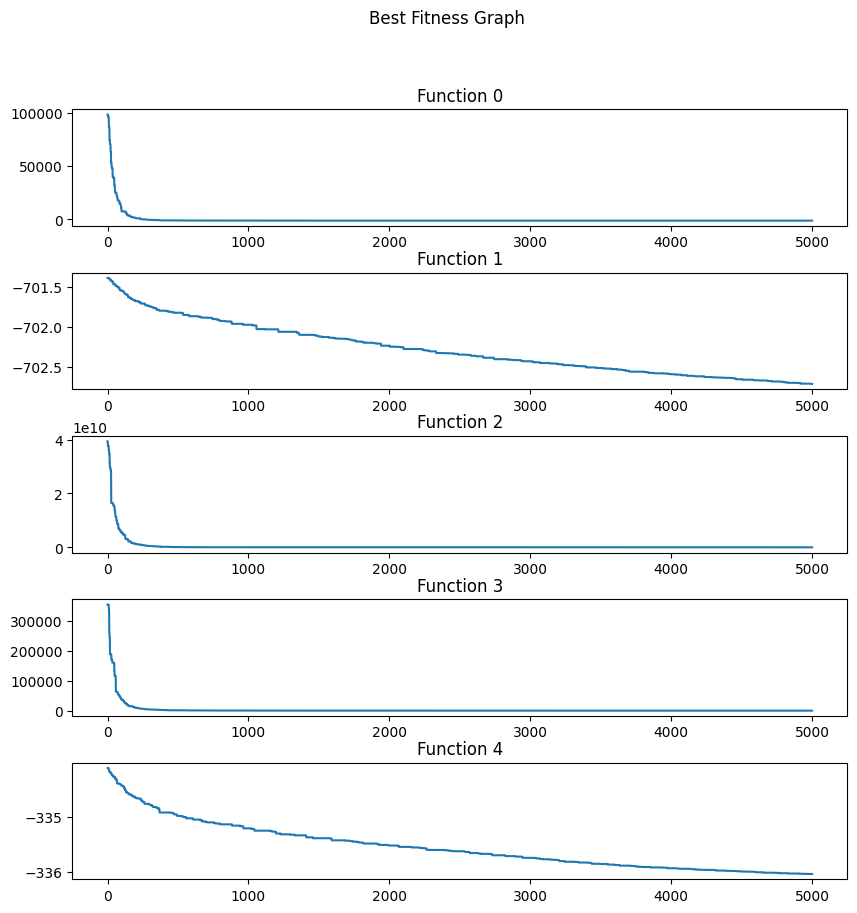

In [18]:
fig, axes = plt.subplots(len(gnbg_tasks))
fig.set_figwidth(10)
fig.set_figheight(10)
# fig.tight_layout()
fig.suptitle("Best Fitness Graph")
fig.subplots_adjust(top=0.88)
plt.subplots_adjust(hspace=0.4)
for i in range(len(gnbg_tasks)):
    axes[i].set_title("Function {0}".format(i))
    axes[i].plot(bfs[i])

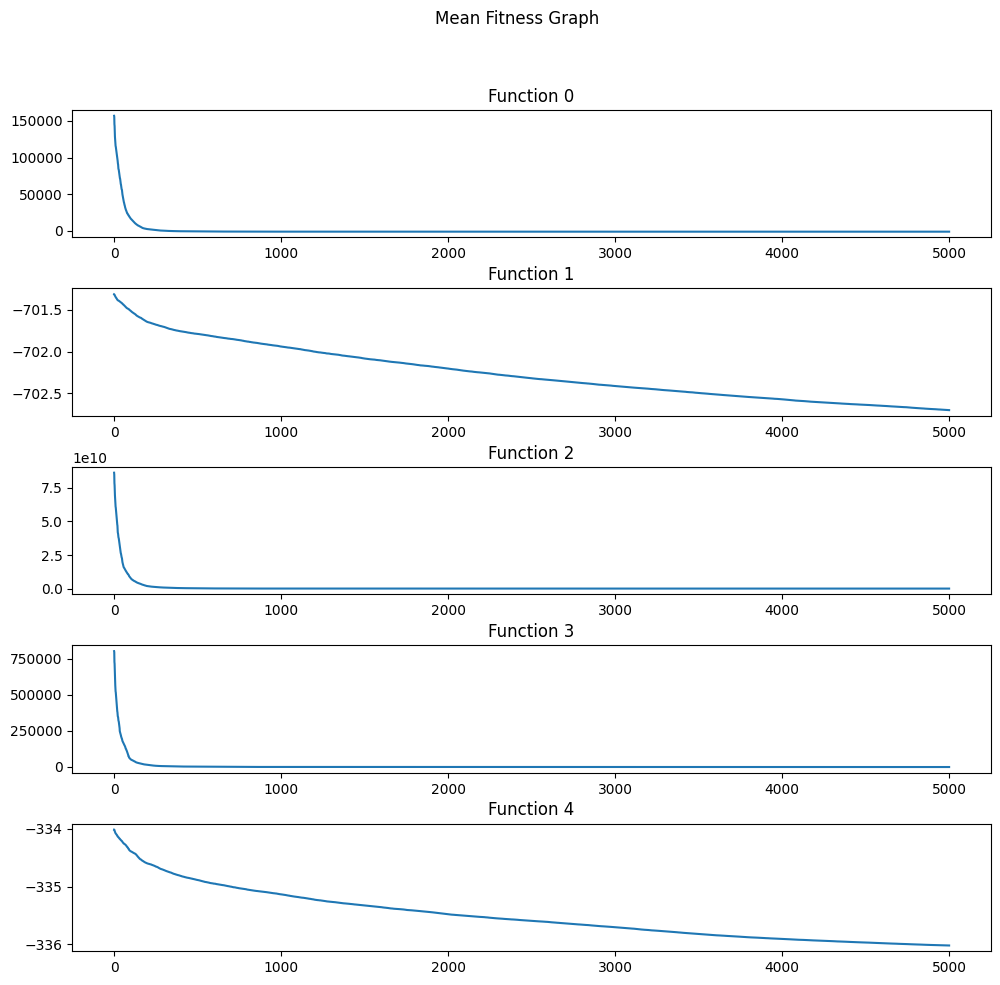

In [17]:
fig, axes = plt.subplots(len(gnbg_tasks))
fig.set_figwidth(10)
fig.set_figheight(10)
fig.tight_layout()
fig.suptitle("Mean Fitness Graph")
fig.subplots_adjust(top=0.88)
plt.subplots_adjust(hspace=0.4)
for i in range(len(gnbg_tasks)):
    axes[i].set_title("Function {0}".format(i))
    axes[i].plot(mfs[i])

In [11]:
gnbg_task = GNBGTask(2)
x = np.random.uniform(-100, 100, size=30)
gnbg_task.fitness(x)

array([-701.30488007])

In [12]:
np.random.uniform([1, 2, 3, 4], [2, 3, 4, 5], size=4)

array([1.10702113, 2.48826797, 3.28592839, 4.57060814])

In [13]:
low_bounds = np.random.randint(1, 4, size=(4, 4))
high_bounds = low_bounds + 1
np.random.uniform(low_bounds, high_bounds, size=(4, 4))

array([[3.28958621, 3.98345981, 2.12777095, 3.67637064],
       [1.65355184, 3.12597742, 2.06214303, 1.40769299],
       [3.34320243, 1.96117396, 2.73126478, 2.1363646 ],
       [3.76381374, 2.79868863, 2.68173813, 1.98170385]])